In [13]:
from IPython.display import HTML, display
display(HTML('<style>.CodeMirror{font-family:Verdana}</style>'))

***
## <span style="color:#000066"> Question 11: Simulated Dataset </span> 
***

#### Importing all dependencies from module

In [14]:
from chapter2_imports import *

### Description

In this problem we will simulate a dataset consisting of two variables X and Y from random normal distribution and perform a Linear Regression analysis 
##### To begin, let's first generate a predictor x and a response y as follows

In [17]:
np.random.seed(10)
x = np.random.normal(size=100)
y = 2 * x * np.random.normal(size=100)
pd.DataFrame({'y':y, 'x': x}).head()

,y,x
0,0.312858,1.331587
1,-2.728728,0.715279
2,2.852528,-1.545400
3,-0.007877,-0.008384
4,-0.179401,0.621336


##### Let's perform a simple linear regression of y onto x, without an intercept. We will report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0 and comment on each of them</b>

In [18]:
fitted_model_rand = sm.OLS(y,x).fit()
fitted_model_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.08604
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.770
Time:                        12:33:14   Log-Likelihood:                -209.71
No. Observations:                 100   AIC:                             421.4
Df Residuals:                      99   BIC:                             424.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0599      0.204      0.293      0.770      -0.345       0.465
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.110
Skew:                           1.772   Prob(JB):                    4.33e-124
Kurtosis:                      14.126   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comments 
***
- So we see that X is statistically non-significant at a significance level of 5%. Further both p-value of Fstat as well as pvalue of t-stat of predictor states that there is no relationship between response and predictor


##### Now let's switch the dependent and independent variables see what impact it has on the coefficients  i.e.  a simple linear regression of x onto y without an intercept

In [22]:
fitted_model_rand_xy = sm.OLS(x,y).fit()
fitted_model_rand_xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.08604
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.770
Time:                        12:34:54   Log-Likelihood:                -138.83
No. Observations:                 100   AIC:                             279.7
Df Residuals:                      99   BIC:                             282.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0145      0.049      0.293      0.770      -0.084       0.113
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.073
Skew:                           0.003   Prob(JB):                        0.964
Kurtosis:                       3.133   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comments:
***
Y is statistically non-significant at a significance level of 5%. Further both p-value of Fstat as well as pvalue of t-stat of predictor states that there is no relationship between response and predictor
So why is the coefficients and its associated standard errors are different in both the scenarios. Yet their t-stat tends to be same ?
To understand the reason , let's do a scatter plot of X vs Y and Y vs X

Text(0.5, 1.0, 'Y vs X ')

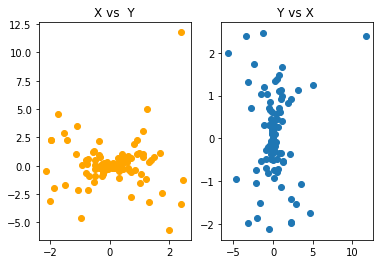

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(x, y, c='orange')
ax1.set_title('X vs  Y')
ax2.scatter(y, x)
ax2.set_title('Y vs X ')

We know that in OLS, the aim is to fit a line that minimises the errors. In the first plot, when the line is fit, the empahsis is on minimizing the erros along the vertical axis and in the second case the ephasis is on minimizin the distance along the horizontal space. This obviously means there the fitted lines in both the plots will have different slopes. 
Mathematically speaking $\beta$ in first case is estimated as $\frac{Cov(X,Y)}{\sigma_y}$ and in second case $\frac{Cov(X,Y)} {\sigma_x}$. So even though numerator remains unaffected, the denominators will be different. The only way we can get same coefficients in SIMPLE linear regression is when we center the data around the origin in which case we expect the same line in both conditions. 
As to why the statistics doesn't change, https://stats.stackexchange.com/questions/422548/simple-linear-regression-swap-x-and-y-why-t-f-dont-change provide a good explanation 

The same analysis hold even in the case of  OLS with Intercept as follows

In [25]:
x1 =  sm.add_constant(x)
fitted_model_mlr = sm.OLS(y,x1).fit()
fitted_model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05647
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.813
Time:                        12:45:38   Log-Likelihood:                -209.49
No. Observations:                 100   AIC:                             423.0
Df Residuals:                      98   BIC:                             428.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1311      0.199      0.658      0.512      -0.264       0.527
x1             0.0488      0.205      0.238      0.813      -0.359       0.456
==============================================================================
Omnibus:                       63.764   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.210
Skew:                           1.786   Prob(JB):                    4.58e-126
Kurtosis:                      14.215   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y1 =  sm.add_constant(y)
fitted_model_mlr = sm.OLS(x,y1).fit()
fitted_model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05647
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.813
Time:                        12:45:39   Log-Likelihood:                -138.51
No. Observations:                 100   AIC:                             281.0
Df Residuals:                      98   BIC:                             286.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0778      0.098      0.795      0.429      -0.116       0.272
x1             0.0118      0.050      0.238      0.813      -0.087       0.110
==============================================================================
Omnibus:                        0.351   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.070
Skew:                           0.004   Prob(JB):                        0.966
Kurtosis:                       3.129   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Other interesting links depicting impact of data changes in OLS model
http://web.stanford.edu/~mrosenfe/soc_meth_proj3/soc_180B_regression_whatchanges.htm